# Volatility-Driven Buy-Write Strategy on S&P 500 Stocks  
### A Backtest and Analysis

**Eric Kasper**  
**CSCI-E278: Quantitative Finance**

---

In this project, I develop and evaluate an **algorithmic buy-write strategy** (also known as a covered call strategy) designed to capitalize on periods of elevated volatility in individual **S&P 500** stocks. The strategy involves initiating stock positions and simultaneously selling short-term options to generate premium income during volatility spikes.

Stock selection from the **S&P 500** is based on analysis of individual stock volatilities. The portfolio is managed dynamically over time, with options sold on selected stocks and positions adjusted based on assignment and expiry outcomes. Trades are equally sized using a fixed notional per position, and fractional shares are allowed to simplify simulation. The strategy focuses on harvesting volatility-driven option premiums while controlling exposure.

To evaluate performance, I compare the strategy against both the **S&P 500** index and a portfolio of randomly selected stocks, providing context for absolute and relative performance. Key metrics include **cumulative returns**, **Sharpe ratios**, and **drawdowns**, with additional risk-adjusted measures such as the **Sortino ratio** to better capture downside risk. Visual comparisons are used to assess relative performance over time.

The final submission will include both a PDF version of this notebook for presentation and grading purposes, and a working copy of the notebook that requires the associated `.csv` data files and `.py` source code. The working version is structured for reproducibility and modular development, using external scripts to manage simulation logic and analysis.

This project reflects my interest in quantitative strategies, portfolio construction, and performance analytics, and aligns closely with the objectives of **CSCI-E278: Quantitative Finance**.


## Strategy Overview

### 1. Market Philosophy: Volatility as an Expression of Panic

This strategy is grounded in the belief that **investors panic**, and that this behavior is **reflected in volatility**. During times of stress, volatility indices such as the **VIX** tend to spike in response to uncertainty or negative news. These spikes are often short-lived and excessive, suggesting an opportunity to capture returns through **mean reversion**.

Having observed several market events—ranging from earnings shocks to systemic dislocations—it is clear that volatility is not just a technical metric, but an emotional one. The goal of this strategy is to systematically detect and monetize those overreactions.

![VIX Chart](vix_chart.png)

---

### 2. The Mechanics of Buy-Write and Sell-Write Strategies

A **buy-write** strategy consists of purchasing a stock while simultaneously selling a call option against it. This approach generates premium income while capping upside beyond the strike price. It is most effective when the underlying asset trades in a range or exhibits modest upward momentum.

The counterpart is the **sell-write**, which involves selling a put option. This expresses a mildly bullish stance and may result in acquiring the stock at an effective discount if exercised.

![Hockey Sticks](hockey_sticks.png)

Both strategies aim to harvest option premium and monetize elevated implied volatility.

---

### 3. Portfolio Design: Diversification Beyond the Ticker

Individual stocks within the same industry or sector often behave similarly. This correlation can lead to unintended concentration risks if not properly managed.

To mitigate this, the strategy imposes sector limits by capping the number of holdings from each industry group. This ensures exposure to a broad set of underlying drivers and helps improve risk-adjusted returns.

![Sector Correlation](correlation.png)

By diversifying across sectors, the strategy reduces the chance that a single thematic shock unduly impacts overall performance.

---

### 4. Volatility Breakout Threshold: Signal Generation

Stock selection is driven by a **volatility breakout threshold**. Specifically, the strategy measures short-term volatility and compares it to each stock’s historical baseline to identify unusual price activity.

The process is as follows:

- Compute 30-day realized volatility for each stock.
- Calculate a z-score relative to the trailing 60-day mean and standard deviation of volatility.
- Rank all stocks by this breakout score, denoted **χ (chi)**.
- Select the top N tickers for further analysis.

> *(Insert: Table or histogram showing χ scores and the selected top-N tickers.)*

This method highlights names experiencing statistically significant changes in volatility, which often precede meaningful price movements.

---

### 5. Momentum Thresholding: The Bullishness Threshold θ

Once a breakout has been identified, the strategy evaluates whether to take a long or short position using a **momentum signal**. This decision is governed by a configurable **bullishness threshold**, denoted **θ (theta)**.

\[
\theta = -1 \times \alpha \times \tau
\]

Where:

- \(\alpha\) is a constant (+1 or -1) based on strategy mode,
- \(\tau\) reflects directional conviction on a scale from 0 (neutral) to 1 (fully bullish).

If a stock's momentum score exceeds θ, a **buy-write** is initiated. If not, a **sell-write** is used.

This approach allows the strategy to respond flexibly to market context, applying a tilt without rigidly enforcing directional bias.

> *(Insert: Diagram showing how changes in θ affect the momentum threshold for trade direction.)*

---

### 6. Simplifying Assumptions and Academic Framing

The analysis operates under a set of simplifying assumptions that enable clear academic evaluation:

- Positions are **equally weighted** by notional size.
- **Fractional shares** are permitted for allocation precision.
- There are no **transaction costs**, commissions, slippage, or spreads.
- A wide range of strikes and maturities is assumed to be available in the **options market** at all times.
- **Historical volatility** is used as a proxy for implied volatility.

> *(Optional: Chart comparing historical vs implied volatility for selected tickers.)*

These assumptions do not reflect actual market conditions but serve to isolate the strategy’s structural logic. For live deployment, further enhancements would be necessary to account for liquidity, execution costs, and the limits of available instruments.

---


## Data, Methodology & Performance Evaluation

#### Data Sources

This experiment draws upon the following publicly available datasets:
- **Stock Prices**: Daily adjusted close prices from Yahoo Finance for S&P 500 constituents.  
- **Constituent List**: The list of current S&P 500 members was scraped from Wikipedia at the outset of the experiment.  
- **Sector Classification**: Sector tags for each ticker were obtained from the same Wikipedia source and cross-validated with Yahoo Finance metadata.

#### Methodology

The simulation proceeds through time in discrete intervals of `t` trading days (typically equal to the option holding window, denoted **𝜏**). At each decision point:

1. Each position either:  
   - **Expires out of the money (OTM)**, in which case the stock remains in the portfolio, or  
   - **Is assigned** (i.e., the option is exercised), and the position is exited.

2. The number of active bets, `N`, is fixed across the simulation. Each position is equally weighted. For example, with 5 positions at $10,000 each, total capital outlay (**𝜅**) is $50,000.

3. After each **𝜏**-day interval, exited positions are replaced using the stock selection process described in the *Strategy Overview* section. Positions that are not assigned remain in the portfolio.

#### Performance Evaluation

Performance is assessed at each decision point based on:
- Realized premiums from expired options (whether assigned or unassigned)  
- Realized **capital gains** from assigned positions  
- Unrealized gains or losses on held stock positions

Over the full simulation horizon, we compute:
- **Total P&L**, expressed as a percentage of **𝜅**  
- **Sharpe Ratio**, calculated using the mean and standard deviation of rolling window returns, annualized

#### Hyperparameter Tuning

The model includes the following tunable hyperparameters:

| Symbol           | Description                                         |
|------------------|-----------------------------------------------------|
| `N`              | Number of active positions                          |
| **𝜏**            | Option holding period (days)                        |
| **𝜆**            | Sector cap: max positions per sector                |
| **ρ̃**            | Correlation threshold between positions             |
| **𝜔**            | Percent out-of-the-money for strike selection       |
| **𝜏ₛ**           | Volatility lookback window                          |
| **𝜃**            | Bullishness filter (see Strategy Overview)          |
| **𝛼**            | Option-writing aggressiveness (see Strategy Overview) |

For this initial version, we tune a reduced set of parameters:  
**`N`**, **ρ̃**, **𝜆**, **𝜔**, and **𝜃**


## Results and Analysis

### Library Imports
To streamline the notebook and encourage modular code, all necessary packages are imported via a centralized Python script (`imports.py`). This supports clean separation of logic and ensures reproducibility across notebooks using the same environment.

In [2]:
%run ../utils/imports.py
%matplotlib inline
import sys
from pathlib import Path

# Notebook is in FinalProject/notebooks/
# This adds FinalProject/ to the path
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


In [3]:
# Pull table from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)

# The first table contains the S&P 500 constituents
sp500_table = tables[0]

# Extract the 'Symbol' column
sp500_tickers = sp500_table['Symbol'].tolist()

# Some symbols have dots instead of dashes (e.g., BRK.B should be BRK-B for Yahoo)
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

# Print first 10 tickers to check
print(f"First 10 tickers: {sp500_tickers[:10]}")

# Save to CSV (optional but recommended)
ticker_list_path = "../data/sp500_tickers.csv"
pd.DataFrame(sp500_tickers, columns=["Ticker"]).to_csv(ticker_list_path, index=False)

print(f"Saved {len(sp500_tickers)} tickers to {ticker_list_path}")

First 10 tickers: ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']
Saved 503 tickers to ../data/sp500_tickers.csv


### Batch Download of S&P 500 Stock Prices and Sector Data

This section downloads historical stock prices and sector classifications for S&P 500 companies from Yahoo Finance. The logic is encapsulated in a Python utility script (`sp500_loader.py`) to ensure modularity, reuse, and clarity.

Key features:
- Tickers are sourced from `sp500_tickers.csv`.
- Price data is saved as individual CSVs in `../data/stock_prices/`.
- Sector mappings are saved to `sector_map.json`.
- Missing tickers are logged to `missing_tickers.txt`.
- A summary of tickers processed is returned and printed.
- Verbose logs are written to `../logs/download.log`, with the last few lines displayed below.

If the `clear_existing` flag is set to `True`, the target directory is cleared before downloading begins. This is defaulted to `False` for safety.


In [4]:
from utils.sp500_loader import download_sp500_with_sectors

summary = download_sp500_with_sectors(start_date="2015-01-01", end_date="2025-04-30",clear_existing=True)

print("📊 Download Summary:")
for k, v in summary.items():
    print(f"  {k.replace('_', ' ').capitalize()}: {v}")

📦 Pulling batch 1 of 26 (20 tickers)
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 2 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 3 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 4 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 5 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 6 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 7 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 8 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 9 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 10 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 11 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 12 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 13 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 14 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 15 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 16 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 17 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 18 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 19 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 20 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 21 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 22 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 23 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 24 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 25 of 26 (20 tickers)


[*********************100%***********************]  20 of 20 completed


📦 Pulling batch 26 of 26 (3 tickers)


[*********************100%***********************]  3 of 3 completed


📊 Download Summary:
  Tickers total: 503
  Tickers saved: 488
  Tickers skipped: 15
  Sector missing: 0
  Status: complete


### Volatility Summary Calculation

This step computes historical volatility metrics for each stock in the dataset.

- **Daily log returns** are calculated from close prices.
- **Rolling volatility** is computed using a 30-day lookback window, annualized.
- For each stock, a **z-score of volatility** is computed to identify relative spikes or drops in volatility over a 60-day trailing window.
- The result is saved to `volatility_summary.csv`, which is later used for volatility-based screening in the strategy.

The computation is modularized in the `createVolDf()` function stored in `py/createVolDf.py`.


In [5]:
from py.createVolDf import createVolDf

# Add the project root to sys.path
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Run the volatility calculation
createVolDf()

# Load and display head of the output
vol_df = pd.read_csv("../data/volatility_summary.csv", parse_dates=["Date"])
print(f"Shape of file: {vol_df.shape}")
print(f"NaNs:\n{vol_df.isna().sum()}")
nvda_df = vol_df[vol_df["Ticker"] == "NVDA"]
display(nvda_df.sort_values("Date", ascending=False).head())

✅ Saved volatility summary with breakout scores.
Shape of file: (1215639, 4)
NaNs:
Date              0
RollingVol        0
Ticker            0
Vol_ZScore    28792
dtype: int64


,Date,RollingVol,Ticker,Vol_ZScore
824872,2025-04-29,0.771398,NVDA,0.583784
824871,2025-04-28,0.772348,NVDA,0.602348
824870,2025-04-25,0.786691,NVDA,0.788400
824869,2025-04-24,0.775827,NVDA,0.666778
824868,2025-04-23,0.791025,NVDA,0.867953


## Volatility Analysis

### Volatility Distribution

The charts below provide a 2×2 summary of the current volatility regime across the S&P 500 universe. The top row focuses on 30-day rolling annualized volatility, while the bottom row evaluates volatility Z-scores, which capture deviations from each stock’s own trailing history.

- Top Left: Histogram of the latest 30-day rolling annualized volatility. Most stocks fall between 30% and 60%, with a long right tail indicating a handful of highly volatile names.
- Top Right: Boxplot of the same data, illustrating moderate skew and a limited number of high-volatility outliers.
- Bottom Left: Histogram of volatility Z-scores, highlighting stocks experiencing statistically significant breakouts from their historical norms.
- Bottom Right: Boxplot of Z-scores, showing a wide spread and long-tailed behavior.

These charts help assess both absolute and relative volatility conditions. Many stocks exhibit elevated but not extreme volatility. A smaller subset shows Z-scores greater than 2.5, signaling abnormal volatility surges that may indicate trading opportunities.

We use both raw volatility and Z-scores as complementary signals in the screening process. While raw volatility identifies persistently active names, Z-scores are effective for detecting regime shifts or potential breakouts. Tracking this distribution through time also offers insight into broader market volatility dynamics.


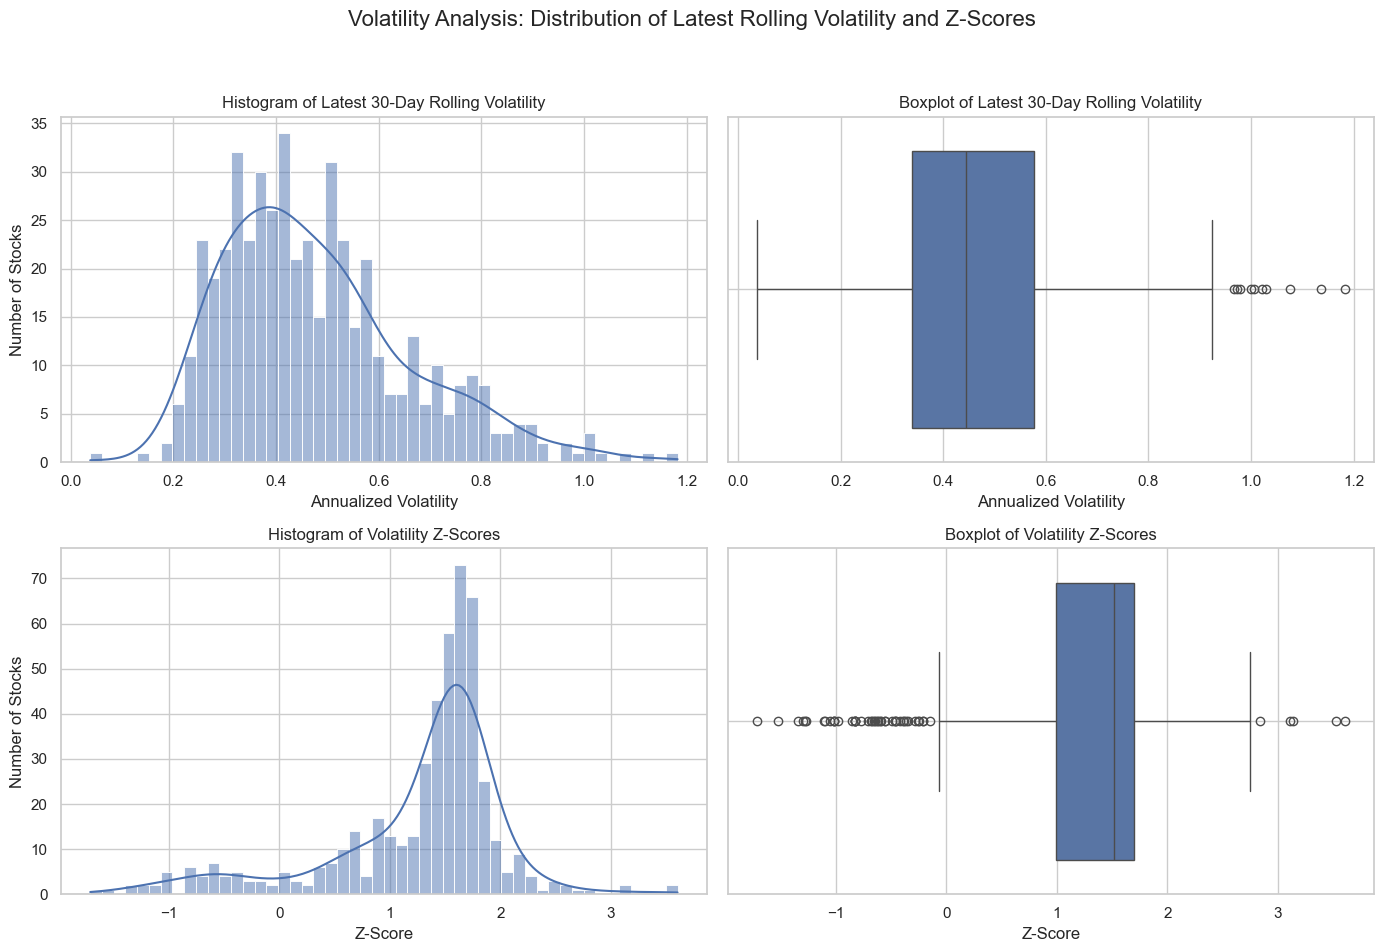

In [6]:

# Ensure the latest observation per ticker
latest_vol = vol_df.sort_values("Date").groupby("Ticker").tail(1)

# Create the 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Volatility Analysis: Distribution of Latest Rolling Volatility and Z-Scores", fontsize=16)

# Top-left: Histogram of RollingVol
sns.histplot(latest_vol["RollingVol"], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Histogram of Latest 30-Day Rolling Volatility")
axs[0, 0].set_xlabel("Annualized Volatility")
axs[0, 0].set_ylabel("Number of Stocks")
axs[0, 0].grid(True)

# Top-right: Boxplot of RollingVol
sns.boxplot(x=latest_vol["RollingVol"], ax=axs[0, 1])
axs[0, 1].set_title("Boxplot of Latest 30-Day Rolling Volatility")
axs[0, 1].set_xlabel("Annualized Volatility")
axs[0, 1].grid(True)

# Bottom-left: Histogram of Vol_ZScore
sns.histplot(latest_vol["Vol_ZScore"].dropna(), bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Histogram of Volatility Z-Scores")
axs[1, 0].set_xlabel("Z-Score")
axs[1, 0].set_ylabel("Number of Stocks")
axs[1, 0].grid(True)

# Bottom-right: Boxplot of Vol_ZScore
sns.boxplot(x=latest_vol["Vol_ZScore"].dropna(), ax=axs[1, 1])
axs[1, 1].set_title("Boxplot of Volatility Z-Scores")
axs[1, 1].set_xlabel("Z-Score")
axs[1, 1].grid(True)

# Adjust spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Volatility Snapshot: Top Stocks by Level and Breakout

The charts below summarize the current volatility landscape across the S&P 500, using both absolute levels and relative changes.

- Top Left: The top 25 stocks ranked by 30-day rolling annualized volatility. These are persistently volatile names that tend to offer larger option premiums, but not necessarily timing signals.
- Bottom Left: The top 25 stocks ranked by volatility Z-score. These represent stocks experiencing statistically significant surges in volatility relative to their own recent history.
- Top Right: Historical volatility trends for the top 5 tickers by absolute level. These stocks remain volatile over time but do not typically exhibit sharp regime shifts.
- Bottom Right: Z-score trends for the top 5 relative breakout names. This panel clearly demonstrates that volatility tends to mean-revert—spikes are followed by normalization, often within a short time frame.

This last chart is central to our approach. The recurring pattern of volatility spikes and reversion suggests that volatility is not only measurable, but predictable. By systematically ranking the universe on Z-score, we can identify candidates that have recently experienced a volatility surge and are statistically likely to revert.

Looking forward, the stock selection algorithm will exploit this feature of volatility. Each rebalance period, we will screen the universe for names exhibiting the strongest relative volatility breakouts. These names will serve as input to the strategy's trade construction logic, with the expectation that we are capturing stocks at or near volatility inflection points.


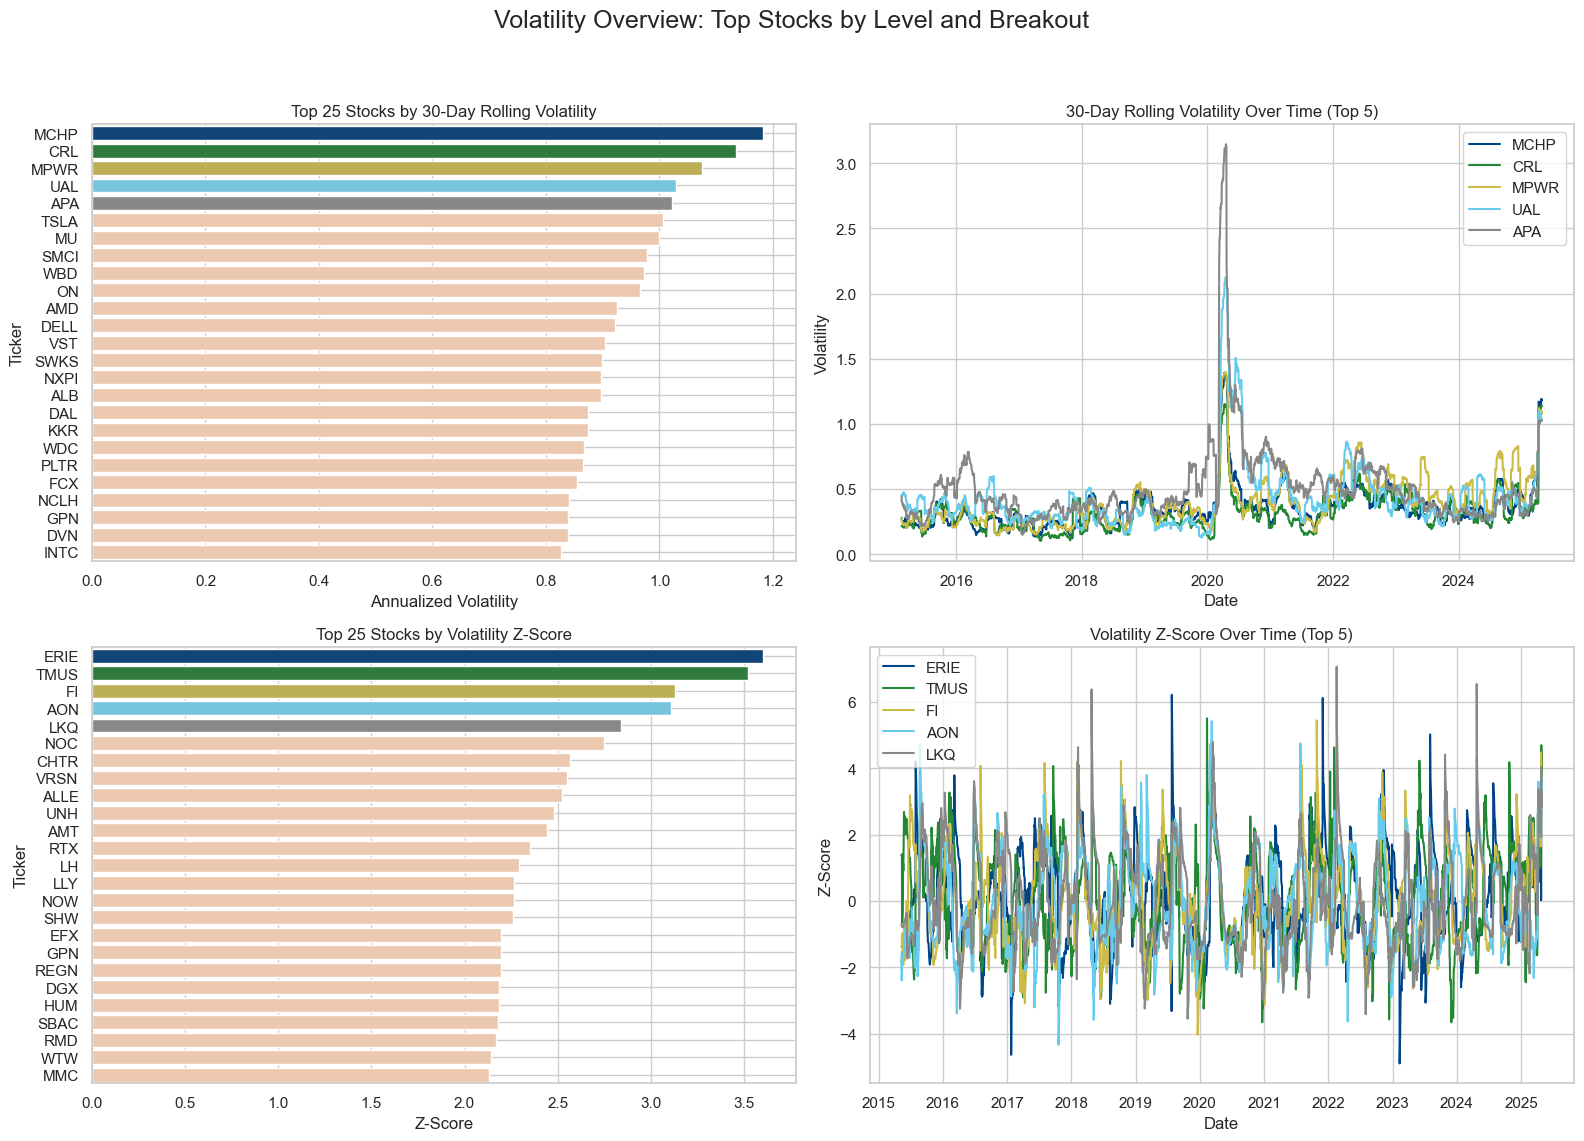

In [7]:

# Ensure most recent observation per ticker
latest_vol = vol_df.sort_values("Date").groupby("Ticker").tail(1)

# Top 25 by RollingVol and Vol_ZScore
top_25_vol = latest_vol.sort_values("RollingVol", ascending=False).head(25)
top_25_zscore = latest_vol.sort_values("Vol_ZScore", ascending=False).head(25)

# Separate top 5 tickers
top_5_vol_tickers = top_25_vol["Ticker"].head(5).tolist()
top_5_zscore_tickers = top_25_zscore["Ticker"].head(5).tolist()

# Use strong colors
# Custom muted-but-distinct palette
custom_palette = ["#004488", "#228833", "#CCBB44", "#66CCEE", "#888888"]
highlight_vol_colors = custom_palette[:len(top_5_vol_tickers)]
highlight_zscore_colors = custom_palette[:len(top_5_zscore_tickers)]
dim_color = "#f7c6a3"

# Barplot palettes with dimmed background for non-top-5
bar_palette_vol = {
    t: highlight_vol_colors[top_5_vol_tickers.index(t)] if t in top_5_vol_tickers else dim_color
    for t in top_25_vol["Ticker"]
}
bar_palette_z = {
    t: highlight_zscore_colors[top_5_zscore_tickers.index(t)] if t in top_5_zscore_tickers else dim_color
    for t in top_25_zscore["Ticker"]
}

# === Plot setup ===
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Volatility Overview: Top Stocks by Level and Breakout", fontsize=18)

# --- Top-left: Barplot of RollingVol ---
sns.barplot(
    data=top_25_vol,
    x="RollingVol",
    y="Ticker",
    hue="Ticker",
    palette=bar_palette_vol,
    ax=axs[0, 0],
    legend=False
)
axs[0, 0].set_title("Top 25 Stocks by 30-Day Rolling Volatility")
axs[0, 0].set_xlabel("Annualized Volatility")
axs[0, 0].set_ylabel("Ticker")
axs[0, 0].grid(True)

# --- Bottom-left: Barplot of Vol_ZScore ---
sns.barplot(
    data=top_25_zscore,
    x="Vol_ZScore",
    y="Ticker",
    hue="Ticker",
    palette=bar_palette_z,
    ax=axs[1, 0],
    legend=False
)
axs[1, 0].set_title("Top 25 Stocks by Volatility Z-Score")
axs[1, 0].set_xlabel("Z-Score")
axs[1, 0].set_ylabel("Ticker")
axs[1, 0].grid(True)

# --- Top-right: Line plot of RollingVol for top 5 (bold colors) ---
for i, ticker in enumerate(top_5_vol_tickers):
    df_plot = vol_df[vol_df["Ticker"] == ticker]
    axs[0, 1].plot(df_plot["Date"], df_plot["RollingVol"], label=ticker, color=highlight_vol_colors[i])

axs[0, 1].set_title("30-Day Rolling Volatility Over Time (Top 5)")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Volatility")
axs[0, 1].grid(True)
axs[0, 1].legend()

# --- Bottom-right: Line plot of Vol_ZScore for top 5 (bold colors) ---
for i, ticker in enumerate(top_5_zscore_tickers):
    df_plot = vol_df[vol_df["Ticker"] == ticker]
    axs[1, 1].plot(df_plot["Date"], df_plot["Vol_ZScore"], label=ticker, color=highlight_zscore_colors[i])

axs[1, 1].set_title("Volatility Z-Score Over Time (Top 5)")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Z-Score")
axs[1, 1].grid(True)
axs[1, 1].legend()

# Layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Strategy Simulation

### Initial Run

The simulation below provides an initial illustration of how the BuyWritePortfolioSimulator operates. The goal at this stage is not to optimize parameters, but to validate the mechanics and generate representative outputs.

This implementation traverses the precomputed volatility summary DataFrame over time. At each decision point (roughly monthly), the strategy:

- Screens the universe using volatility Z-scores ("breakout" mode).
- Selects up to five stocks with the strongest positive breakouts.
- Limits sector concentration to three unique sectors.
- Filters out stocks that are highly correlated with each other (threshold: 0.85).
- Allocates $10,000 per position using fractional share sizing.
- Sells a 21-day call option on each position with a fixed expiry assumption.

All parameters are configurable and several will be tuned in subsequent sections. The current run uses placeholder values chosen for clarity and speed.

The output below includes execution logs from the simulator and summary statistics of the portfolio’s behavior over the backtest period.


In [8]:
from BuyWritePortfolioSimulator import BuyWritePortfolioSimulator
# Load pre-calculated volatility summary
vol_summary_df = pd.read_csv("../data/volatility_summary.csv", parse_dates=["Date"])

# Initialize the simulator
simulator = BuyWritePortfolioSimulator(
    vol_summary_df=vol_summary_df,
    price_dir="../data/stock_prices",
    notional_per_trade=10000,
    num_positions=5,
    option_days=21,
    sector_limit=3,
    correlation_threshold=0.85,
    screen_mode='breakout',
    vol_zscore_threshold=0,
    debug=False
)

# Run the simulation
portfolio_results = simulator.run()